In [15]:
# Diese Zeile importiert sogenannte Packages, die es uns erlauben auf von anderen geschriebenen Code zuzugreifen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Notebook für die Übung Medizininformatik

Dieses Notebook soll einen ersten Einblick in die Arbeit mit Daten und Machine Learning in der Medizin geben. Es besteht keineswegs der Anspruch, dass Sie den Code vollständig verstehen, geschweige denn reproduzieren können. Stattdessen sollen Sie ein Gefühl dafür kriegen, wie Daten in Python gehandhabt werden und wie das Trainieren eines Machine Learning Modells aussehen kann.

AUFGABE: Führen Sie den Code Zeile für Zeile aus. Eine bereits ausgeführte Zeile kann den Datensatz verändern und in darauffolgenden Zeilen zu Fehlern führen. Sollte dies bei Ihnen vorkommen, können Sie über "restart kernel" neu starten. Allerdings muss dann von der ersten Zeile aus alles wieder ausgeführt werden. Sie finden in diesem Notebook Fragen und gelb markierte ToDos, die Sie bitte bearbeiten.

Wir geben einige Informationen zum medizinischen Kontext dieser Aufgabe, allerdings ist dies nicht im Fokus dieser Veranstaltung (oder uns Lehrenden). Ausserdem ist heute nur sehr begrenzt Zeit, weshalb wir Sie bitten sich nicht zu lange mit den medizinischen Aspekten dieses Use Cases aufzuhalten, sondern sich auf die technischen Details zu konzentrieren.

## Schritt 0: Hintergrund & Zieldefinition

Dieser Datensatz stammt aus dem folgenden Paper: Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).

Herz-Kreislauf-Erkrankungen sind weltweit die Todesursache Nr. 1 und fordern jedes Jahr schätzungsweise 17,9 Millionen Menschenleben, was 31 % aller Todesfälle weltweit ausmacht. Menschen, die an einer Herz-Kreislauf-Erkrankung leiden oder ein hohes kardiovaskuläres Risiko aufweisen (aufgrund eines oder mehrerer Risikofaktoren wie Bluthochdruck, Diabetes, Hyperlipidämie oder einer bereits bestehenden Erkrankung), müssen frühzeitig erkannt und behandelt werden, wobei ein Modell des maschinellen Lernens eine große Hilfe sein kann.

Unser Datensatz enthält 274 Patient:innen (jeweils eine Reihe) mit jeweils 12 Merkmalen (Spalten) aus dem Faisalabad Institute of Cardiology am Allied Hospital in Faisalabad (Punjab, Pakistan) von April – Dezember 2015. Alle Patient:innen hatten New York Heart Association Klasse III oder IV Herzinsuffizienz.

Die letzte Spalte (DEATH_EVENT) sagt aus, ob die Person verstorben bis zum Follow Up zwischen 4-285 (Durchschnitt 130) Tagen nach Aufnahme der Werte verstorben ist.

Binären Features (0 oder 1)
- Sex: 0 ist Mann, 1 ist Frau
- High blood pressure: Unveröffentlichtes Kriterium für Bluthochdruck, 1 ist ja, 0 ist nein
- Anaemia: Haematocrit level <36% = 1, sonst 0
- Diabetes Diagnose: 1 ist ja, 0 ist nein
- Smoking: 1 ist Raucher, 0 ist Nicht-raucher

Numerische Features
- Age: Alter in Jahren
- Creatinine phosphokinase in mcg/L
- Ejection fraction in %
- Platelets in kiloplatelets/mL
- Serum creatinine in mg/dL
- Serum sodium in mEq/L


## Schritt 1: Daten (Ein-)Sammeln

Der folgende Code läd einen ausgewählten Teil dieses Datensatzes in unsere Entwicklungsumgebung.

In [2]:
# Datensatz laden
# Wir benennen den Datensatz mit "df" (steht für DataFrame) und nutzen aus dem Pandas (pd) Package die "read_csv" Methode um die csv Datei einzulesen.
# Jetzt können wir mit "df" auf unseren Datensatz zugreifen
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# durch .describe() werden die Namen und deskriptiven Statistiken pro Spalte für unser df angezeigt
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,67.542580,0.408759,588.237226,0.423358,38.445255,0.350365,262696.995109,1.355876,136.726277,0.675182,0.324818,0.259124
std,116.864789,0.492504,983.011296,0.494995,11.579899,0.477957,95917.605698,1.002654,4.333391,0.469164,0.469164,0.438956
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,115.750000,0.000000,30.000000,0.000000,215250.000000,0.900000,134.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,261000.000000,1.100000,137.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.300000,140.000000,1.000000,1.000000,1.000000
max,1985.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,1.000000


## Schritt 2: Daten Exploration
welche Visualiserung könnte spannend sein? Sucht eine der folgenden Code Snippits aus, schreibt einen Spaltennamen, der euch interessiert in die ""  hinter "column =".

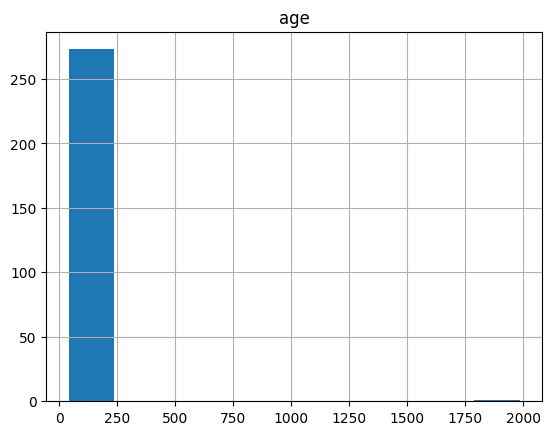

In [3]:
#Todo: Schaut euch die Histogramme and und ersetzt diesen Wert für andere numerische Variablen, die euch interessieren
# Hinweis: Bei Python müssen Texte immer in "" angegeben sein. Ohne "" handelt es sich um einen Namen einer Variable oder Ähnliches. Schreiben Sie die Antwort also zum Beispiel als "age" nicht age

column = "age"
# Histogram Einzelne Variable
df.hist(column)
plt.show()

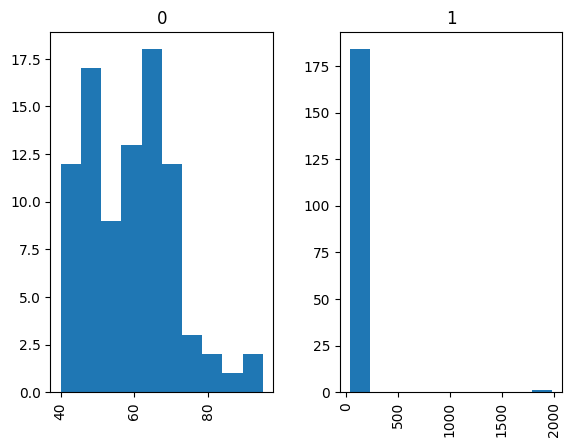

In [4]:
#Todo: Schaut euch die Histogramme an und ersetzt den cat_variable Wert für andere kategorische Variablen, die euch interessieren
# Histogram einer Variable (numerisch) nach Gruppen aufgeteilt. Für die cat_variable ergeben nur Binäre Variablen Sinn (s. oben)
cat_variable = 'sex'
df.hist(column, by=cat_variable)
plt.show()

In [5]:
# Wir visualisieren die Korrelation des Datensatzes. Welche Variable ist am meisten mit "DEATH_EVENT" assoziert?
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.081455,-0.035996,-0.060173,-0.011354,-0.037080,-0.012039,-0.011829,-0.000079,0.049079,-0.042175,-0.011605
anaemia,0.081455,1.000000,-0.165542,-0.021277,0.073304,-0.003748,-0.070173,0.058837,0.061199,-0.073246,-0.101133,-0.000371
creatinine_phosphokinase,-0.035996,-0.165542,1.000000,-0.031930,-0.075698,-0.057184,0.029236,-0.088220,0.024287,0.092864,0.009840,0.083033
diabetes,-0.060173,-0.021277,-0.031930,1.000000,-0.030450,-0.009945,0.097913,-0.079721,-0.106300,-0.147022,-0.136891,0.015874
ejection_fraction,-0.011354,0.073304,-0.075698,-0.030450,1.000000,0.055762,0.089921,-0.029424,0.214713,-0.158021,-0.070543,-0.266354
high_blood_pressure,-0.037080,-0.003748,-0.057184,-0.009945,0.055762,1.000000,0.031477,0.002033,0.021713,-0.111365,-0.051986,0.089463
platelets,-0.012039,-0.070173,0.029236,0.097913,0.089921,0.031477,1.000000,-0.032346,0.004482,-0.113915,0.013661,-0.069946
serum_creatinine,-0.011829,0.058837,-0.088220,-0.079721,-0.029424,0.002033,-0.032346,1.000000,-0.230635,0.038724,-0.013572,0.288905
serum_sodium,-0.000079,0.061199,0.024287,-0.106300,0.214713,0.021713,0.004482,-0.230635,1.000000,-0.034883,0.016866,-0.191734
sex,0.049079,-0.073246,0.092864,-0.147022,-0.158021,-0.111365,-0.113915,0.038724,-0.034883,1.000000,0.447798,0.090036


## Schritt 3: Data Cleaning

Der maximal Wert in der Spalte "age" beträgt 1985, aber ein Patient im Alter von 1985 Jahren ist natürlich eher unrealistisch. Ersetzt die Zahl hinter "korrekter_wert = " mit eurer besten Idee, wie alt dieser Patient sein könnte.

In [6]:
#Todo: Ersetzt diesen Wert für eure beste Idee, welches Alter dieser Patient hat
korrekter_wert = 1985

# Diese Code schaut, wo in unserem DataFrame (df) in der Spalte "age" der Wert 1985 ist
# Für Felder mit dem Wert 1985 ersetzt er diesen Wert mit dem, was wir in korrekter_wert angeben.
# Für alle anderen Werte behält er was vorher in der Spalt "age" stand.

df.age = np.where(df.age==1985, korrekter_wert, df.age)
df.age.max()

np.float64(1985.0)

## Schritt 4: Feature Engineering
An dieser Stelle kann man sich überlegen, wie man die Daten noch verbessern kann um das Verhältnis von wichtigen Informationen zu unwichtigen Informationen zu erhöhen. Dieser Datensatz ist schon recht kompakt und die Zeit heute begrenzt, weshalb wir diesen Schritt überspringen.

Beispiele wo bereits Feature Engineering hier betrieben wurde ist der binäre Indikator für Bluthochdruck, da die absoluten Werte bereits interpretiert wurden.

Ein weiteres, hier nicht zutreffendes Beispiel für  Feature Engineering wäre aus Gewicht und Größe den BMI berechnen (95 kg bei 1.60 Körpergröße ist im Sinne eines Risikofaktors anders zu bewerten als bei 1.95 m Körpergröße).
       -

## Schritt 5: Machine Learning

Jetzt gehen wir zum Machine Learning Teil über. Wir importieren ein Logistisches Regressionsmodell, welches uns eine Vorhersage für das Todesevent (1 oder 0) herausgeben kann.

In [11]:
# Wir importieren die benötigten Packages und Modelle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Wir laden das Modell und benennen es zu "lr"
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

# Unsere X Features sind alle Werte, die wir zur Vorhersage nutzen wollen. Wir können auch weniger nehmen.
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']]

# unser y Wert ist das, was wir vorhersagen wollen
y = df['DEATH_EVENT']

# Wir teilen unsere Daten in 80% Trainings- und 20% Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
# Beim "fit" berechnet das Modell, welche Funktion sich am besten an die Trainingsdaten anpasst

lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [13]:
# Jetzt können wir schauen, wie gut das Modell auf den Testdaten performed. Dafür berechnen wir die Accuracy (True Positives + True Negatives) / (#Reihen) und plotten die Confusion Matrix.
#TODO: Ist das ein gutes Vorhersagemodell?

lr.score(X_test, y_test)


0.7246376811594203

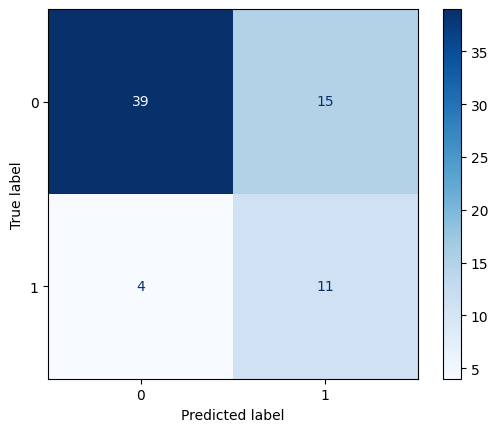

In [14]:
# Hier laden wir das Package um uns die Confusion Matrix anzeigen zu lassen
from sklearn.metrics import ConfusionMatrixDisplay

# wir geben unseren trainiertes Modell "lr" und unsere test features (X_test) und die korrekten y-Werte (y_test) ein, um zu prüfen, wie unser Modell auf neuen, bislang ungesehenen Patient:innen performt hätte.
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')